In [13]:
import umap.umap_ as umap
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

VER = 'v2'

In [14]:
data_dir = "/Users/michellewu/Projects/Spatial-Genomics-Processing/2020-10-02-10xGenomics/data/{}/processed/spatial_cluster.csv".format(VER)

In [15]:
df = pd.read_csv(data_dir)
list_barcodes = df['barcode']

In [16]:
df_umap = df.drop(columns = ['barcode','row', 'col', 'pxl_col_in_fullres',
       'pxl_row_in_fullres', 'pxl_col_in_lowres', 'pxl_row_in_lowres',
       'pxl_col_in_highres', 'pxl_row_in_highres','cluster_2', 'cluster_3', 'cluster_4',
       'cluster_5', 'cluster_6', 'cluster_7','cluster_8','cluster_9','cluster_10'])

In [17]:
df_umap.head(5)

,AC090692.3,AC090692.1,LDLRAD3,AL136146.2,COMMD9,PRR5L,AC087277.1,AC087277.2,AC009656.1,TRAF6,...,AP000944.6,POLA2,AP000944.7,CDC42EP2,DPF2,TIGD3,AP000944.1,SLC25A45,FRMD8,NEAT1
0,0,0,0,0,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,9
2,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,14
3,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,3,0,0,0,1,27
4,0,0,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5


In [18]:
reducer = umap.UMAP()
embedding = reducer.fit_transform(df_umap)

In [19]:
df_embedding = pd.DataFrame(embedding)
df_embedding = df_embedding.rename(columns = {0:'umap_x', 1:'umap_y'})

In [20]:
df_all = pd.concat([df, df_embedding], axis = 1)
df_all.head(5)

,barcode,AC090692.3,AC090692.1,LDLRAD3,AL136146.2,COMMD9,PRR5L,AC087277.1,AC087277.2,AC009656.1,...,cluster_3,cluster_4,cluster_5,cluster_6,cluster_7,cluster_8,cluster_9,cluster_10,umap_x,umap_y
0,AAACAACGAATAGTTC-1,0,0,0,0,2,0,0,0,0,...,1,4,3,2,4,5,4,6,7.111850,5.815030
1,AAACAAGTATCTCCCA-1,0,0,0,0,0,0,0,0,0,...,2,4,3,2,7,8,9,8,8.434303,3.639861
2,AAACAATCTACTAGCA-1,0,0,1,0,1,0,0,0,0,...,1,1,1,1,1,2,2,2,-0.064410,8.078473
3,AAACACCAATAACTGC-1,0,0,0,0,1,0,0,0,0,...,3,2,4,5,5,4,3,3,-2.618392,9.615922
4,AAACAGAGCGACTCCT-1,0,0,2,0,0,0,0,0,0,...,2,4,3,2,7,8,9,8,7.387033,4.005140


In [21]:
df_all.to_csv('/Users/michellewu/Projects/Spatial-Genomics-Processing/2020-10-02-10xGenomics/data/{}/processed/embedding.csv'.format(VER), index=False)

In [22]:
sns.color_palette()

[(0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 (1.0, 0.4980392156862745, 0.054901960784313725),
 (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
 (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
 (0.5490196078431373, 0.33725490196078434, 0.29411764705882354),
 (0.8901960784313725, 0.4666666666666667, 0.7607843137254902),
 (0.4980392156862745, 0.4980392156862745, 0.4980392156862745),
 (0.7372549019607844, 0.7411764705882353, 0.13333333333333333),
 (0.09019607843137255, 0.7450980392156863, 0.8117647058823529)]

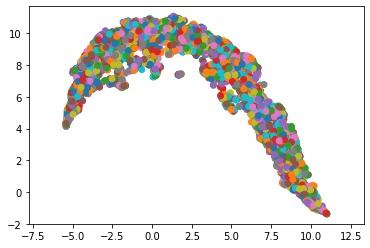

In [23]:
plt.scatter(
    embedding[:, 0],
    embedding[:, 1],
    c=[sns.color_palette()[x%10] for x in range(len(list_barcodes))])
plt.gca().set_aspect('equal', 'datalim')